## **Import Library**

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, Activation, BatchNormalization)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

## **Memuat CIFAR-10, normalisasi piksel, dan one-hot encoding**

In [8]:
# Memuat dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi data gambar menjadi nilai antara 0 dan 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Mengubah label menjadi format one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **Membuat model Sequential dengan blok konvolusi pertama**

In [37]:
model = Sequential()

# Blok Konvolusi 1
model.add(Conv2D(32, (3, 3), padding='same', 
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

## **Menambahkan blok konvolusi kedua**

In [10]:
# Blok Konvolusi 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

## **Menambahkan blok konvolusi ketiga**

In [11]:
# Blok Konvolusi 3
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

## **Menambahkan lapisan fully connected**

In [12]:
# Lapisan Fully Connected
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## **Mengompilasi model dengan Adam**

In [13]:
# Menggunakan optimizer Adam
optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

## **Melatih model dengan early stopping dan model checkpoint**

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',  
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [early_stopping, model_checkpoint]

history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,  
    validation_data=(x_test, y_test),
    callbacks=callbacks,
    verbose=1
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.3425 - loss: 2.1826
Epoch 1: val_loss improved from inf to 1.24911, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 104ms/step - accuracy: 0.3426 - loss: 2.1821 - val_accuracy: 0.5537 - val_loss: 1.2491
Epoch 2/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5729 - loss: 1.2144
Epoch 2: val_loss improved from 1.24911 to 0.96742, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.5730 - loss: 1.2143 - val_accuracy: 0.6610 - val_loss: 0.9674
Epoch 3/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6642 - loss: 0.9661
Epoch 3: val_loss did not improve from 0.96742
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6643 - loss: 0.9660 - val_accuracy: 0.6182 - val_loss: 1.1388
Epoch 4/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7110 - loss: 0.8319
Epoch 4: val_loss improved from 0.96742 to 0.72483, saving model to best_model.k

## **Mengevaluasi model dan mencetak akurasi uji**

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 3s - 8ms/step - accuracy: 0.8135 - loss: 0.5536

Test accuracy: 0.8134999871253967


In [16]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [17]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 16520), started 0:13:36 ago. (Use '!kill 16520' to kill it.)

## **Memplot akurasi pelatihan dan validasi per epoch**

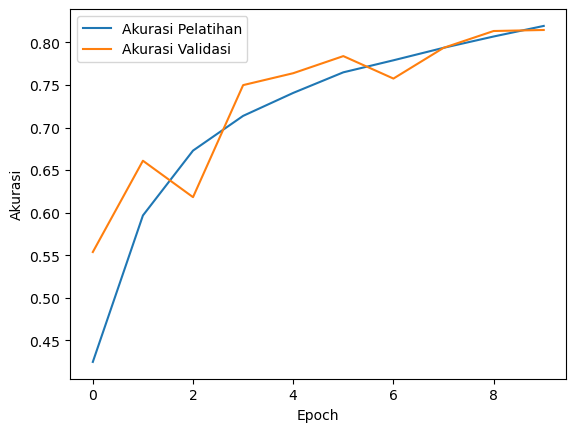

In [18]:
# Plot Akurasi
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

## **Menampilkan ringkasan arsitektur model**

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 2,479,488 (9.46 MB)

 Trainable params: 825,514 (3.15 MB)

 Non-trainable params: 2,944 (11.50 KB)

 Optimizer params: 1,651,030 (6.30 MB)

## **Menyimpan model dalam file cfr-model.h5**

In [ ]:
model.save('crf.h5')